In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

***Australian Rainy Weather Prediction
 Dataset:***

*   **Date**

*   **Location:**	49 different locations has been considered.

*   **MinTemp:** Minimum temp in degree celcius

*   **MaxTemp:** Maximum temp in degree celcius

*   **Rainfall:**	The amount of rainfall recorded for the day in mm.

*   **Evaporation:**	Evaporation(mm) in 24hours


*   **Sunshine:**	number of hours of bright sunshine.

*   **WindGustDir:**	The direction of the strongest wind gust in the 24 hours to midnight

*   **WindGustSpeed:**	The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   **WindDir9am, WindDir3pm:**	Direction of wind at 9am and 3pm

*   **WindSpeed9am, WindSpeed3pm:** Speed of wind at 9am and 3pm

*   **Humidity9am, Humidity3pm:** Humidity at 9am and 3pm
*   **Pressure9am, Pressure3pm:** Atmospheric pressure at 9am and 3pm

*   **Cloud9am, Cloud3pm:** Fraction of sky obscured by cloud at 9am

*   **Temp9am, Temp3pm:** Temperature at 9am and 3pm

*   **RainToday:**
         1 = rained today
         0 = didn't rain today
*   **RainTomorrow [Target column]:**          
         
         1 = Will be raining tomorrow
         0 = won't be raining tomorrow





In [2]:
# read dataset from a public Google Drive File

file_link = 'https://drive.google.com/file/d/1GIZGQ2_jJHRJh6Cx8UY-uVqXFTMtAXbT/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,145460.000000
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,11/12/2013,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,NaN
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,0.241599
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,0.428054
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,0.000000
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,0.000000


In [6]:
df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [7]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [8]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


RainTomorrow
0    110317
1     35143
Name: count, dtype: int64


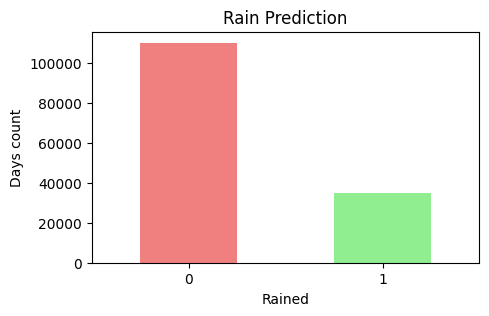

In [9]:
# Visualize the distribution of the 'RainTomorrow' variable

print(df.value_counts('RainTomorrow'))

plt.figure(figsize=(5, 3))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Rain Prediction')
plt.xlabel('Rained')
plt.ylabel('Days count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

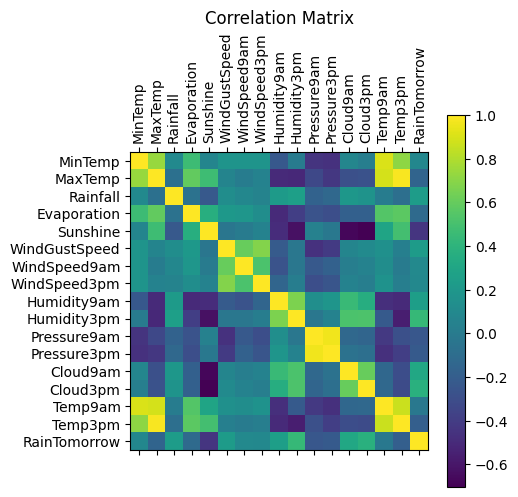

In [10]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Prepocessing

In [11]:
#drop redundant feature(s)
df = df.drop(['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0


In [12]:
#drop duplicates
df = df.drop_duplicates()
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0


In [13]:
# Drop rows with missing values
df.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


In [14]:
# Fill missing values in numerical features with column's mean value
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)
#you can also use dictionary and run loop to replace null values with mean
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.611212,7.712435,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.494952,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,5.611212,7.712435,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.411175,4.494952,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,5.611212,7.712435,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.411175,2.000000,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,5.611212,7.712435,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.411175,4.494952,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,5.611212,7.712435,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,5.611212,7.712435,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.411175,4.494952,9.4,20.9,No,0
145455,Uluru,2.8,23.4,0.0,5.611212,7.712435,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.411175,4.494952,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,5.611212,7.712435,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.411175,4.494952,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,5.611212,7.712435,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.411175,4.494952,12.5,26.1,No,0


In [15]:
df.shape

(124513, 22)

In [16]:
#check for total null value for each feature
df.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [17]:
#check for categorical and numerical variables in df
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


In [18]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
df.isnull().sum()
df.shape

(124513, 114)

In [19]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,5.611212,7.712435,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,True,False,True,False
1,7.4,25.1,0.0,5.611212,7.712435,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,True,True,False
2,12.9,25.7,0.0,5.611212,7.712435,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,True,True,False
3,9.2,28.0,0.0,5.611212,7.712435,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,True,False
4,17.5,32.3,1.0,5.611212,7.712435,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,True,False


In [20]:
df.shape

(124513, 114)

# Implementing AdaBoost using Scikit-learn Library

sklearn AdaBoost reference: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [21]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['RainTomorrow'], axis=1)
# df['RainTomorrow']= df['RainTomorrow'].replace(0, -1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (99610, 113)
X_test shape: (24903, 113)
y_train shape: (99610,)
y_test shape: (24903,)


In [23]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.826
Accuracy score (validation): 0.828


In [24]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.846
Accuracy score (validation): 0.846


# **Hometask**

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [48]:
# read dataset from a public Google Drive File
file_link = 'https://drive.google.com/file/d/1T0Zhwm7v-oMouWoOzl_elKKN7k9MV6CK/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
data = pd.read_csv(new_link)

# Handle missing values#################imported new library
imputer=SimpleImputer(strategy="mean")
data["Sunlight_Hours"]=imputer.fit_transform(data[["Sunlight_Hours"]])
data["Temperature"]=imputer.fit_transform(data[["Temperature"]])
data["Humidity"]=imputer.fit_transform(data[["Humidity"]])
data=data.dropna()

# Encode categorical variables
label_encoders = {}
for col in ["Soil_Type", "Water_Frequency", "Fertilizer_Type"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split features and target
X=data.drop(columns=["Growth_Milestone"])
y=data["Growth_Milestone"]
############################done####################
#Standardize
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators=[5, 10, 15]
learning_rates=[0.1, 0.3, 0.4]
results=[]

for n in n_estimators:
    for lr in learning_rates:
        ada=AdaBoostClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        # Fit befor predictions
        ada.fit(X_train, y_train)
        #acrcy
        y_val_pred = ada.predict(X_test) # Now you can predict using the fitted model
        print("Accuracy score (training): {0:.3f}".format(ada.score(X_train, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(ada.score(X_test, y_test)))
        print("-----------------------------------------------------------------------------")


Accuracy score (training): 0.651
Accuracy score (validation): 0.538
-----------------------------------------------------------------------------
Accuracy score (training): 0.651
Accuracy score (validation): 0.538
-----------------------------------------------------------------------------
Accuracy score (training): 0.651
Accuracy score (validation): 0.538
-----------------------------------------------------------------------------
Accuracy score (training): 0.651
Accuracy score (validation): 0.538
-----------------------------------------------------------------------------
Accuracy score (training): 0.697
Accuracy score (validation): 0.590
-----------------------------------------------------------------------------
Accuracy score (training): 0.704
Accuracy score (validation): 0.513
-----------------------------------------------------------------------------
Accuracy score (training): 0.697
Accuracy score (validation): 0.615
--------------------------------------------------------